### Diseñar una red que clasifique el dataset MNIST

        Introducción
<div style="text-align: justify;">
La presente tarea se enfoca en analizar la implementación de la red Perceptron Multicapa por medio de la librería TensorFlow. La base de datos a utilizar es la base de datos MNIST, la cual fue obtenida de la librería de tensorflow. Está librería está compuesta por un conjunto de entrenamiento de 60,000 y un conjunto de prueba de 10,000.
</div>

        Justificación
<div style="text-align: justify;">
La realización de esta tarea, brinda al estudiante una mejor comprensión sobre la arquitectura de la red Perceptron multicapa. El desarrollo del Perceptron llevó a la generación de un nuevo tipo de red, cuya principal característica es el uso de varias capas, así bien la implementación de la función de activación sigmoide. Este tipo de redes se utiliza usualmente para resolver problemas de asociación de patrones, segmentación de imágenes, comprensión de datos, etc.
</div>

        Código

In [ ]:
##Librerias
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

Importar base de datos MNIST

In [ ]:
(x_train,y_train),(x_test,y_test)= tf.keras.datasets.mnist.load_data()

In [ ]:
print('x_train:',x_train.shape,'y_train:', y_train.shape)
print('x_test:',x_test.shape,'y_test:',y_test.shape)


x_train: (60000, 28, 28) y_train: (60000,)
x_test: (10000, 28, 28) y_test: (10000,)


Modificación del tamaño de x_train y x_test

In [ ]:
x_train = x_train.reshape((len(x_train), x_train.shape[1]*x_train.shape[2]))
x_test = x_test.reshape((len(x_test), x_test.shape[1]*x_test.shape[2]))

In [ ]:
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)

x_train: (60000, 784)
x_test: (10000, 784)


Normalización

In [ ]:
print('x_train max:',x_train.max())
print('x_train min:',x_train.min())

x_train max: 255
x_train min: 0


In [ ]:
print('x_test max:',x_test.max())
print('x_test min:',x_test.min())

x_test max: 255
x_test min: 0


In [ ]:
x_train = x_train/255.0
print('x_train max:',x_train.max())
print('x_train min:',x_train.min())

x_train max: 1.0
x_train min: 0.0


In [ ]:
x_test =x_test/ 255.0
print('x_test max:',x_test.max())
print('x_test min:',x_test.min())

x_test max: 1.0
x_test min: 0.0


División del dataset

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 0.8)

In [ ]:
print('x_train:', x_train.shape)
print('x_val:', x_val.shape) 
print('x_test:', x_test.shape)
print("")
print('y_train:', y_train.shape) 
print('y_val:',y_val.shape)  
print('y_test:',y_test.shape)

x_train: (48000, 784)
x_val: (12000, 784)
x_test: (10000, 784)

y_train: (48000,)
y_val: (12000,)
y_test: (10000,)


Cambiando etiquetas a codificacion "one hot"

In [ ]:
print(y_train[100])

1


In [ ]:
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
print(y_train[100])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


Definición de los modelos en keras

In [ ]:
model = Sequential()
model.add(Dense(2, input_shape=(784,), activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

#### Primera prueba Perceptron Multicapa

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [ ]:
inputs = Input(shape=(784,)) #x_train(48000,784)
x = Dense(32, activation='sigmoid')(inputs)
x = Dense(32, activation='sigmoid')(x)
x = Dense(16, activation='sigmoid')(x)
x = Dense(10, activation='softmax')(x)

model=Model(inputs=inputs,outputs=x)

In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_27 (Dense)            (None, 32)                25120     
                                                                 
 dense_28 (Dense)            (None, 32)                1056      
                                                                 
 dense_29 (Dense)            (None, 16)                528       
                                                                 
 dense_30 (Dense)            (None, 10)                170       
                                                                 
Total params: 26,874
Trainable params: 26,874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.SGD(learning_rate =0.5),metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=20, batch_size=12, verbose=1)

Epoch 1/20
4000/4000 [==============================] - 9s 2ms/step - loss: 0.5831 - accuracy: 0.8117 - val_loss: 0.2570 - val_accuracy: 0.9250
Epoch 2/20
4000/4000 [==============================] - 7s 2ms/step - loss: 0.2081 - accuracy: 0.9395 - val_loss: 0.1671 - val_accuracy: 0.9532
Epoch 3/20
4000/4000 [==============================] - 8s 2ms/step - loss: 0.1685 - accuracy: 0.9495 - val_loss: 0.1829 - val_accuracy: 0.9454
Epoch 4/20
4000/4000 [==============================] - 8s 2ms/step - loss: 0.1426 - accuracy: 0.9568 - val_loss: 0.1461 - val_accuracy: 0.9572
Epoch 5/20
4000/4000 [==============================] - 8s 2ms/step - loss: 0.1258 - accuracy: 0.9627 - val_loss: 0.1558 - val_accuracy: 0.9528
Epoch 6/20
4000/4000 [==============================] - 8s 2ms/step - loss: 0.1162 - accuracy: 0.9655 - val_loss: 0.1401 - val_accuracy: 0.9592
Epoch 7/20
4000/4000 [==============================] - 7s 2ms/step - loss: 0.1060 - accuracy: 0.9678 - val_loss: 0.1443 - val_accuracy:

Predicciones del modelo

In [ ]:
pred = model.predict(x_test)
print(pred)
print(pred.shape)
print(" ")
pred = np.argmax(pred,axis=1) #nos da el indice de un elemento de un vector máximo 
print(pred)
print(pred.shape)
label=np.argmax(y_test,axis=1)

[[1.05968596e-07 1.83027078e-04 3.08313320e-04 ... 9.99110043e-01
  2.88693141e-08 2.10481114e-04]
 [6.22942825e-05 1.83497046e-04 9.99331236e-01 ... 2.41789371e-06
  3.62135361e-05 9.05910486e-11]
 [1.71060138e-10 9.99910474e-01 9.93273079e-06 ... 4.25664803e-05
  5.41349664e-06 1.79108355e-08]
 ...
 [5.50099855e-07 4.05734454e-06 8.25652478e-06 ... 4.97864448e-06
  1.10747021e-06 6.14613236e-05]
 [3.23525484e-07 1.10105830e-05 1.49517575e-07 ... 3.51190323e-07
  8.38572032e-06 1.77442616e-05]
 [3.01478631e-05 1.03422042e-06 1.46400794e-07 ... 2.94885338e-10
  1.49648861e-06 6.36958433e-08]]
(10000, 10)
 
[7 2 1 ... 4 5 6]
(10000,)


Evaluación de la red entrenada

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.16286161541938782
Test accuracy: 0.9599000215530396


#### Segunda Prueba Perceptron Multicapa 

In [ ]:
inputs = Input(shape=(784,)) #x_train(48000,784)
x = Dense(32, activation='sigmoid')(inputs)
x = Dense(64, activation='sigmoid')(x)
x = Dense(32, activation='sigmoid')(x)
x = Dense(10, activation='softmax')(x)

model=Model(inputs=inputs,outputs=x)

In [ ]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_31 (Dense)            (None, 32)                25120     
                                                                 
 dense_32 (Dense)            (None, 64)                2112      
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 10)                330       
                                                                 
Total params: 29,642
Trainable params: 29,642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.SGD(learning_rate =0.5),metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=20, batch_size=128, verbose=1)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 1.9067 - accuracy: 0.3204 - val_loss: 1.0586 - val_accuracy: 0.6601
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6757 - accuracy: 0.8048 - val_loss: 0.4699 - val_accuracy: 0.8731
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3943 - accuracy: 0.8898 - val_loss: 0.3178 - val_accuracy: 0.9132
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2906 - accuracy: 0.9191 - val_loss: 0.2737 - val_accuracy: 0.9222
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2373 - accuracy: 0.9323 - val_loss: 0.2158 - val_accuracy: 0.9393
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2053 - accuracy: 0.9409 - val_loss: 0.1939 - val_accuracy: 0.9463
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1815 - accuracy: 0.9482 - val_loss: 0.1812 - val_accuracy: 0.9484
Epoch 

Evaluación de la red entrenada

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.14843115210533142
Test accuracy: 0.9545000195503235


#### Tercera Prueba Perceptron Multicapa

In [ ]:
inputs = Input(shape=(784,)) #x_train(48000,784)
x = Dense(32, activation='sigmoid')(inputs)
x = Dense(32, activation='sigmoid')(x)
x = Dense(10, activation='softmax')(x)

model=Model(inputs=inputs,outputs=x)

In [ ]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_35 (Dense)            (None, 32)                25120     
                                                                 
 dense_36 (Dense)            (None, 32)                1056      
                                                                 
 dense_37 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.SGD(learning_rate =0.5),metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=20, batch_size=128, verbose=1)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 1.0729 - accuracy: 0.6876 - val_loss: 0.4663 - val_accuracy: 0.8723
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3766 - accuracy: 0.8956 - val_loss: 0.3184 - val_accuracy: 0.9107
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2831 - accuracy: 0.9193 - val_loss: 0.2563 - val_accuracy: 0.9298
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2326 - accuracy: 0.9329 - val_loss: 0.2171 - val_accuracy: 0.9396
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1993 - accuracy: 0.9417 - val_loss: 0.1946 - val_accuracy: 0.9441
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1758 - accuracy: 0.9486 - val_loss: 0.1751 - val_accuracy: 0.9508
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1580 - accuracy: 0.9542 - val_loss: 0.1646 - val_accuracy: 0.9513
Epoch 

Evaluación de la red entrenada

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.11562632024288177
Test accuracy: 0.9646000266075134


#### Cuarta Prueba Perceptron Multicapa

In [ ]:
inputs = Input(shape=(784,)) #x_train(48000,784)
x = Dense(8, activation='sigmoid')(inputs)
x = Dense(32, activation='sigmoid')(x)
x = Dense(10, activation='softmax')(x)

model=Model(inputs=inputs,outputs=x)

In [ ]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_38 (Dense)            (None, 8)                 6280      
                                                                 
 dense_39 (Dense)            (None, 32)                288       
                                                                 
 dense_40 (Dense)            (None, 10)                330       
                                                                 
Total params: 6,898
Trainable params: 6,898
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.SGD(learning_rate =0.5),metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=20, batch_size=16, verbose=1)

Epoch 1/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.6078 - accuracy: 0.8073 - val_loss: 0.3683 - val_accuracy: 0.8950
Epoch 2/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.3526 - accuracy: 0.8958 - val_loss: 0.3530 - val_accuracy: 0.8931
Epoch 3/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.3226 - accuracy: 0.9041 - val_loss: 0.3172 - val_accuracy: 0.9080
Epoch 4/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.3056 - accuracy: 0.9088 - val_loss: 0.3104 - val_accuracy: 0.9092
Epoch 5/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2981 - accuracy: 0.9117 - val_loss: 0.3003 - val_accuracy: 0.9112
Epoch 6/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2874 - accuracy: 0.9147 - val_loss: 0.3189 - val_accuracy: 0.9082
Epoch 7/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2797 - accuracy: 0.9177 - val_loss: 0.2931 - val_accuracy:

Evaluación de la red entrenada

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.27866315841674805
Test accuracy: 0.92330002784729


#### Quinta Prueba Perceptron Multicapa

In [ ]:
inputs = Input(shape=(784,)) #x_train(48000,784)
x = Dense(16, activation='sigmoid')(inputs)
x = Dense(16, activation='sigmoid')(x)
x = Dense(10, activation='softmax')(x)

model=Model(inputs=inputs,outputs=x)

In [ ]:
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_44 (Dense)            (None, 16)                12560     
                                                                 
 dense_45 (Dense)            (None, 16)                272       
                                                                 
 dense_46 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.SGD(learning_rate =0.5),metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=20, batch_size=256, verbose=1)

Epoch 1/20
188/188 [==============================] - 1s 4ms/step - loss: 1.7508 - accuracy: 0.4791 - val_loss: 1.0623 - val_accuracy: 0.7448
Epoch 2/20
188/188 [==============================] - 1s 4ms/step - loss: 0.7694 - accuracy: 0.8172 - val_loss: 0.5736 - val_accuracy: 0.8589
Epoch 3/20
188/188 [==============================] - 1s 4ms/step - loss: 0.4964 - accuracy: 0.8733 - val_loss: 0.4424 - val_accuracy: 0.8831
Epoch 4/20
188/188 [==============================] - 1s 4ms/step - loss: 0.4016 - accuracy: 0.8923 - val_loss: 0.3873 - val_accuracy: 0.8911
Epoch 5/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3514 - accuracy: 0.9036 - val_loss: 0.3360 - val_accuracy: 0.9068
Epoch 6/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3170 - accuracy: 0.9115 - val_loss: 0.3206 - val_accuracy: 0.9094
Epoch 7/20
188/188 [==============================] - 1s 4ms/step - loss: 0.2919 - accuracy: 0.9184 - val_loss: 0.2878 - val_accuracy: 0.9190
Epoch 

Evaluación de la red entrenada

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.19671088457107544
Test accuracy: 0.9448999762535095


### Comparación de Resultados

<div style="text-align: justify;">
En la siguiente tabla se pueden comparan los resultados obtenidos en la evaluación de cada uno de los modelos entrenados, en donde se puede apreciar que cada uno de los modelos tuvieron buenos resultados, aunque entre ellos destaca el modelo 3, el cual obtuvo el mejor resultado.
</div>

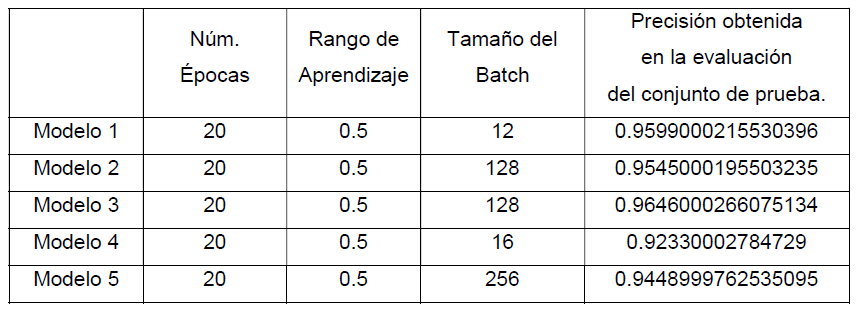

### Referencias Bibliográficas

[1] TensorFlow. Clasificación MNIST. Recuperado el día 05 de Marzo de 2022 de
https://www.tensorflow.org/quantum/tutorials/mnist
[2] Capitulo 3. Perceptron Multicapa. Recuperado el día 05 de Marzo de 2022 de
http://catarina.udlap.mx/u_dl_a/tales/documentos/lep/mejia_s_ja/capitulo3.pdf